# Time Series in Pandas
## Datetime Index

In [77]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
year = 2020
month = 1
day = 2
hour = 13
minute = 30
sec = 15

In [3]:
#create datetime object
my_date = datetime(year, month, day)

In [4]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [5]:
my_datetime = datetime(year, month, day, hour, minute, sec)

In [6]:
my_datetime

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [7]:
#getting day of the month, same for hour, etc.
my_datetime.day

2

In [15]:
# [D] stands for 'day', tells us that numpy has applied a day level of precision, you can pass in a different level of precision in [] after datetime 
np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype = 'datetime64[D]')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [17]:
#using np.arange to step up dates sequentially, you can make them any step you want, again specifying the level in []
np.arange('2018-06-21', '2018-06-29', 1, dtype = 'datetime64[D]')

array(['2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
       '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28'],
      dtype='datetime64[D]')

In [18]:
np.arange('2001', '2018', dtype = 'datetime64[Y]')

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'], dtype='datetime64[Y]')

In [21]:
#similar to np.arange
pd.date_range('2020-01-01', periods = 7, freq = 'D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [22]:
#pandas is really good at recognizing date formats, I just typed this in and it bought it
pd.date_range('Jan 1, 2016', periods = 7, freq = 'D')

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07'],
              dtype='datetime64[ns]', freq='D')

In [27]:
#transforming strings into datetime, we've done this a lot with entire columns
pd.to_datetime(['Jan 5, 2013', '01-03-2019'])

DatetimeIndex(['2013-01-05', '2019-01-03'], dtype='datetime64[ns]', freq=None)

In [33]:
#specify the format being used (defaults to year-month-day) we can specify in the format= how we want pandas to show the date, month first, day first
pd.to_datetime('2/1/2018', format = '%m/%d/%Y')

Timestamp('2018-02-01 00:00:00')

In [35]:
#create random data
data = np.random.randn(3, 2)
columns = ['a', 'b']
print(data)

[[-0.5742033   0.96928457]
 [-0.32321223 -0.3989486 ]
 [ 1.99986017 -0.50592071]]


In [40]:
idx = pd.date_range('2020-01-01', periods = 3, freq = 'D')

df = pd.DataFrame(data, index = idx, columns = columns)
df

,a,b
2020-01-01,-0.574203,0.969285
2020-01-02,-0.323212,-0.398949
2020-01-03,1.999860,-0.505921


In [43]:
#looking at date index
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [46]:
#getting max date
df.index.max()

Timestamp('2020-01-03 00:00:00')

In [47]:
#index largest date
df.index.argmax()

2

In [48]:
#index earliest date
df.index.argmin()

0

## Time Resampling
- kindve like groupby(), its aggregating information based on a time period

In [57]:
import os
os.getcwd()

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Udemy Courses\\Timeseries Forecasting\\data'

In [51]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Udemy Courses\\Timeseries Forecasting\\data')

In [63]:
# we can also read in the data with specific data types and make columns indices
df = pd.read_csv('starbucks.csv', index_col = 'Date', parse_dates = True)

In [64]:
#starbucks stock prices
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [66]:
#parse_dates makes this a datetime index!
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [69]:
# daily -- -> yearly, mean closing price for any particular year
df.resample(rule = 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


__probably won't use this, but good to know__

In [70]:
# we could also create our own custom functions to use as an aggreagate with resample, so if we wanted to see the first day's closing price of 
# of starbucks stock (keep in mind the data table returned will have the wrong dates next to it since its an index, the values in the 'close' column will be for
# the first day though)
def first_day(entry):
    
    #is there an entry?
    if len(entry) != 0:
        #return first entry
        return entry[0]

In [72]:
df.resample(rule = 'A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [73]:
#yep the first day matches
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


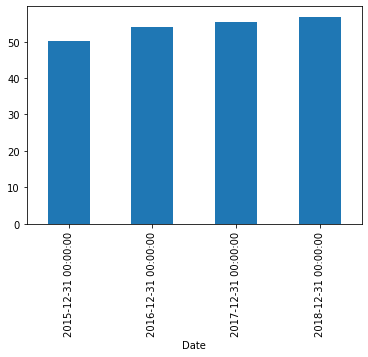

In [78]:
#plot average closing price per year
df['Close'].resample('A').mean().plot.bar()

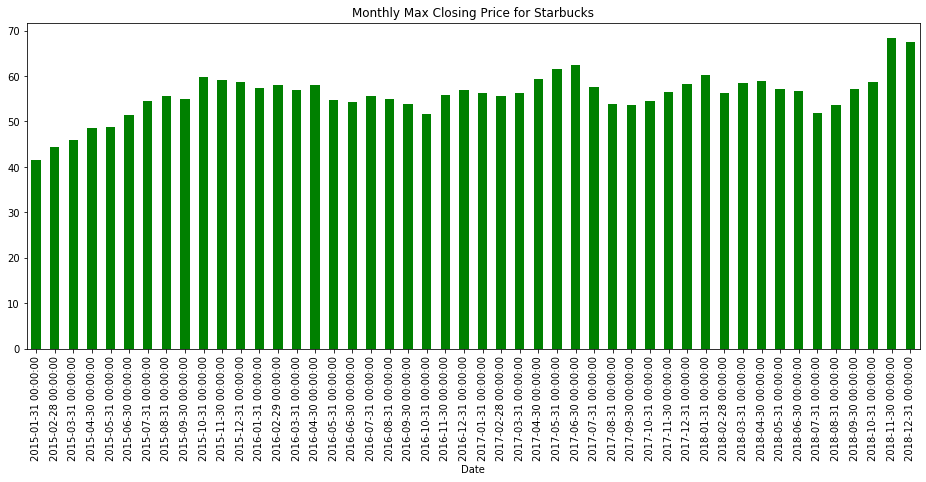

In [148]:
#resample on month
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='green');

## Time Shifting
- shifting data up or down on the index

In [83]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [84]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [90]:
#shifts all of the dates 
df.shift(5).head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,38.0061,6906098.0
2015-01-12,37.2781,11623796.0
2015-01-13,36.9748,7664340.0
2015-01-14,37.8848,9732554.0


In [88]:
#lose the last bit of info
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [94]:
#shift backwards
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [95]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [150]:
#can shift based on timeseries frequency codes too, so I can shift an entire month or even year, here we are doing a month
# notice how everything in January is now shifted to the end of january
df.shift(periods = 1, freq = 'M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


For more info on time shifting visit http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html<br>

## Rolling and Expanding
- A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. 

In [98]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


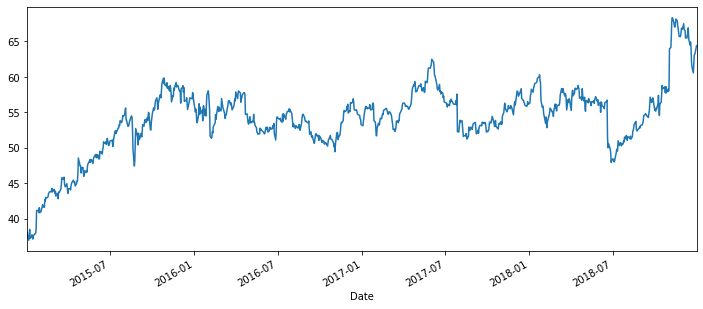

In [100]:
#closing price throughout time
df['Close'].plot(figsize = (12, 5))

In [103]:
# we can choose a window of any length to look at 
# Notice how the first 6 values are NAN, this is becuase any time you use a rolling window you will get the first n-1 values empty, then the first value
# will be the average closing price based on the last seven days (or whatever you specify), the very next value will be for the seven days immediately prior
# to that, and so on it goes, it updates based on each day
df.rolling(window = 7).mean().head(20)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


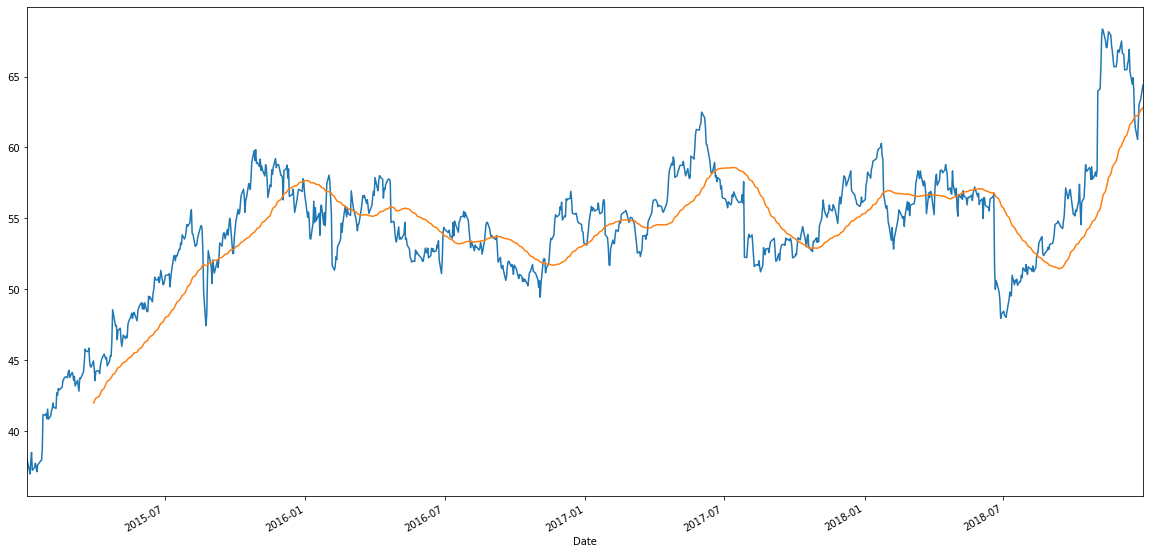

In [107]:
#plotting the daily data against the rolling mean (notice there is no info fot the first few days)
df['Close'].plot(figsize = (20, 10))
#we can make the window ANY size
df.rolling(window = 60).mean()['Close'].plot()

In [115]:
df['close 30 day mean'] = df['Close'].rolling(window = 30).mean()

In [116]:
df.head()

,Close,Volume,close 30 dat mean,close 30 day mean
Date,,,,
2015-01-02,38.0061,6906098,NaN,NaN
2015-01-05,37.2781,11623796,NaN,NaN
2015-01-06,36.9748,7664340,NaN,NaN
2015-01-07,37.8848,9732554,NaN,NaN
2015-01-08,38.4961,13170548,NaN,NaN


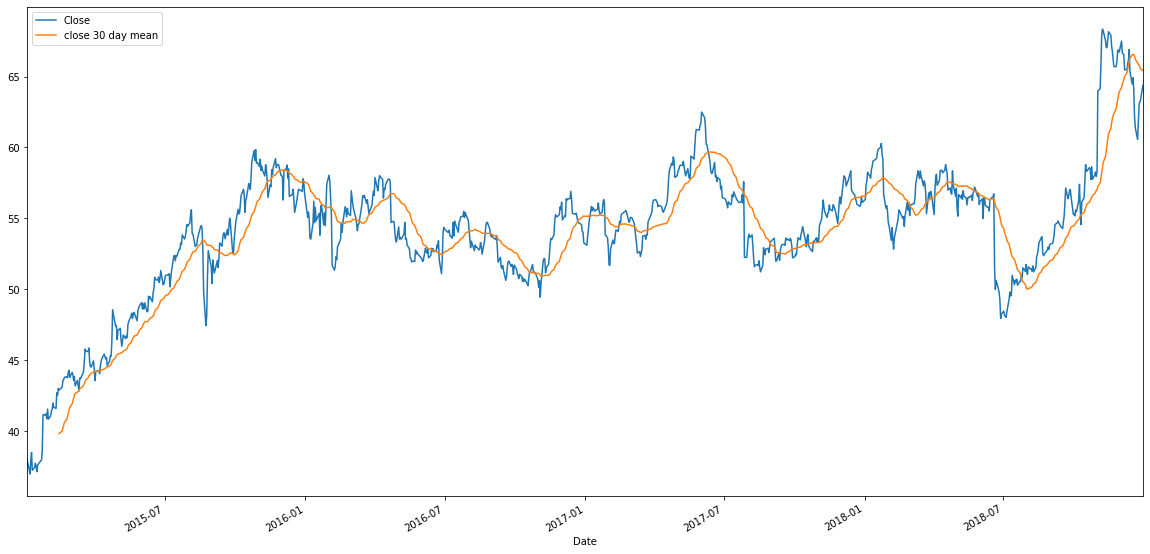

In [117]:
#plotting this info after adding the column to the df
df[['Close', 'close 30 day mean']].plot(figsize = (20, 10))

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

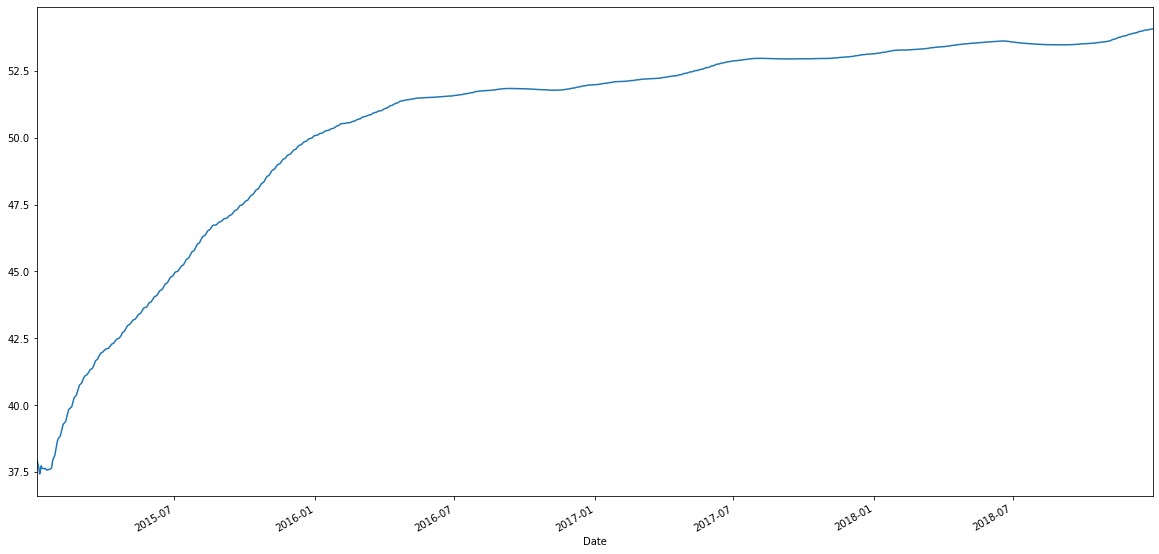

In [118]:
#Expanding window, basically shows the average (or whatever aggregate function you used) for the entire data over time rather than the windows
# think of this as kindve like fitting a regression line to a dataset, its not giving you exact points in the data, its giving you a general mean
df['Close'].expanding().mean().plot(figsize = (20, 10))

NOTE: this is just for me to understand this a little better, but rolling mean only takes the window of time that you are specifying in the data and looks at how the mean changes every 7 days or whatever it is, whereas the expanding mean takes all the data points n-1 into account to create an overall aggregate of the data!!!

## Visualizing Time Series Data

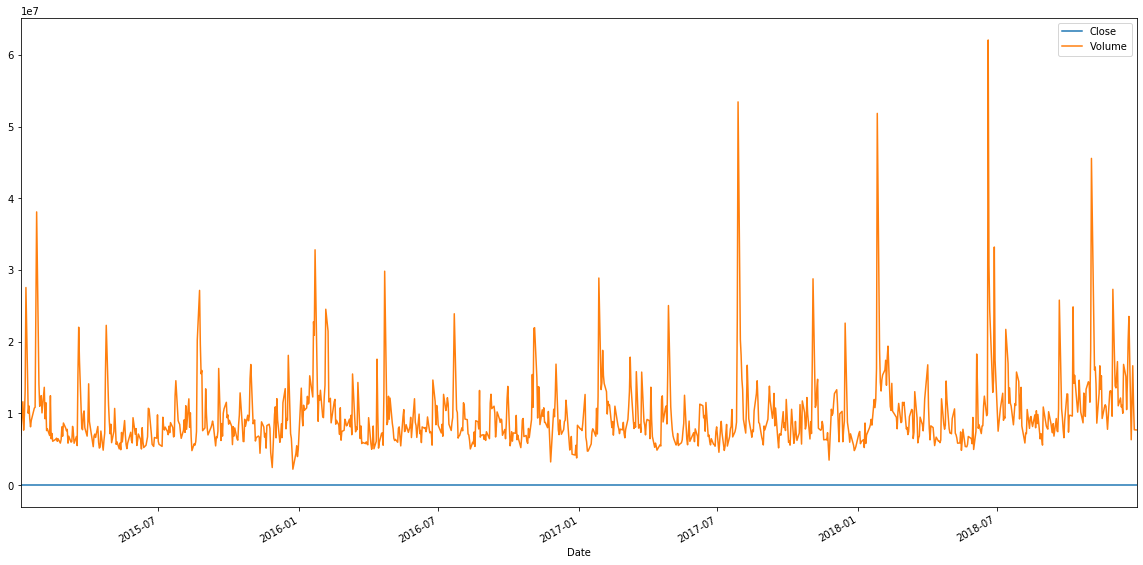

In [124]:
#plot the df (had to delete columns from last exercise)
#see how it automatically plots both columns
# df.drop(['close 30 dat mean', 'close 30 day mean'], axis = 1, inplace = True)
df.plot(figsize = (20, 10))

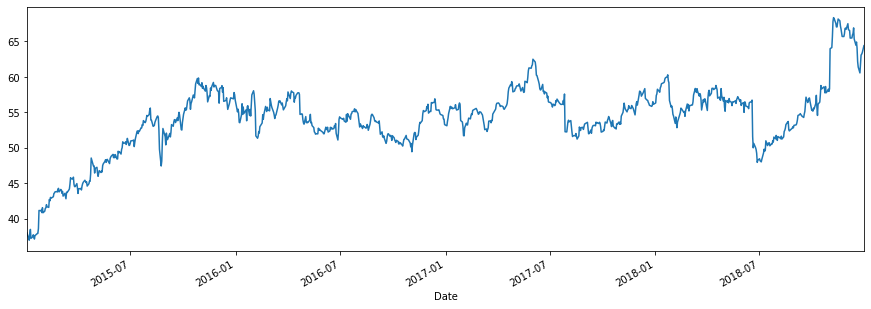

In [128]:
#NOTE: the ; gets rid of the text before the plot!!! I've been trying to figure that out for months haha
df['Close'].plot(figsize = (15, 5));

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

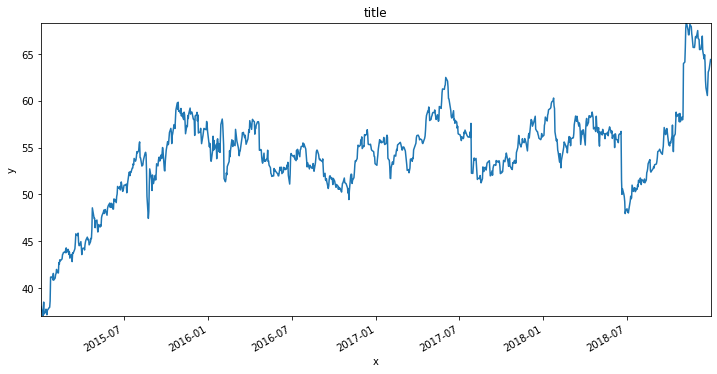

In [131]:
title = 'title'
ylabel = 'y'
xlabel = 'x'
ax = df['Close'].plot(figsize = (12, 6), title = title)
ax.autoscale(axis = 'both', tight = True) #scales the plot automatically (whatever)
ax.set(xlabel = xlabel, ylabel = ylabel)

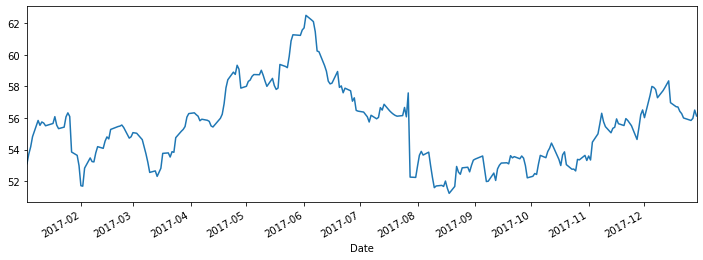

In [132]:
#specify specific window for plotting, subsetting series like this is really neat
df['Close']['2017-01-01':'2017-12-31'].plot(figsize = (12, 4))

## Customizing plots

In [134]:
from matplotlib import dates

[Text(0.5, 0, '')]

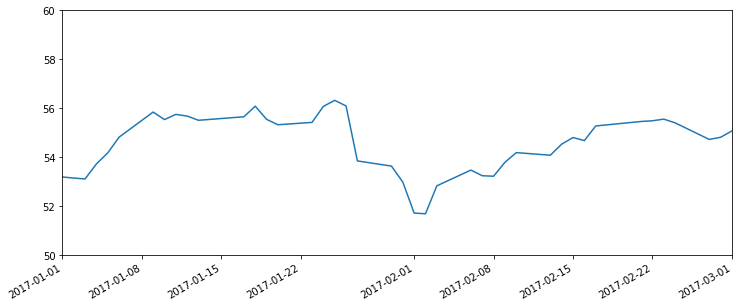

In [139]:
#setting x ticks
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], ylim = [50, 60], figsize = (12, 5))
ax.set(xlabel = '') #gets rid of x label 'Date'

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

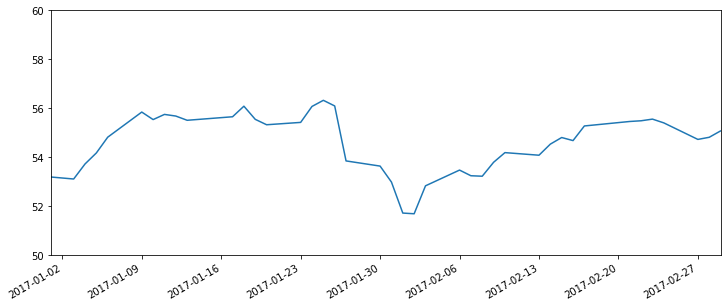

In [140]:
#setting x ticks
#notice how nicely everything is spaced on this plot, its becuase of our set_major_locator argument
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], ylim = [50, 60], figsize = (12, 5))
ax.set(xlabel = '') #gets rid of x label 'Date'
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0)) #again, see the link in the markdown cell above for all date locator codes (BTW 0 = Monday)

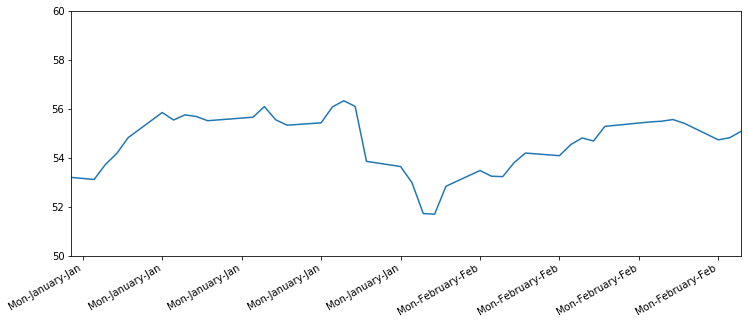

In [143]:
# use codes in the table in the markdown cell above for date formatting to set the format of the date
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], ylim = [50, 60], figsize = (12, 5))
ax.set(xlabel = '') #gets rid of x label 'Date'
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%b')) #looks so nice in the plot!, you can change this a million different ways from the table above

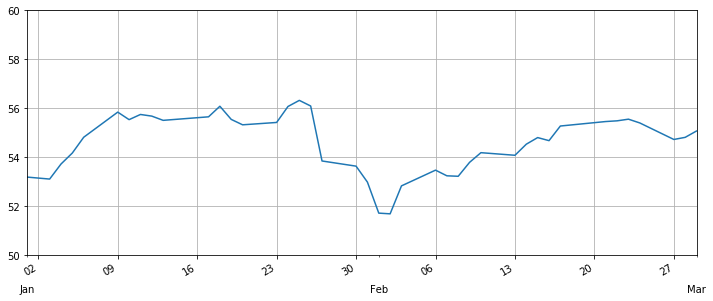

In [146]:
# setting minor axes, dont know if this is necessary, but you can do it
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], ylim = [50, 60], figsize = (12, 5))
ax.set(xlabel = '') #gets rid of x label 'Date'

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b')) #'\n\n' adds lines spacing betweent numbers and the abreviations for the month

ax.xaxis.grid(True)
ax.yaxis.grid(True) #just adds a grid